# Project: MNIST Handwritten Digit Classification
---



## Objective:
 The goal of this project is to build a machine learning model capable of correctly identifying handwritten digits from images. This is a Supervised Learning task, specifically a Multiclass Classification problem, as the model will be trained with labeled examples (images of digits and their corresponding values).

### Performance Measure: The primary metric for success will be Accuracy.

### Target Goal: Achieve >97% accuracy on the held-out test set.

##The Dataset
We will use the MNIST (Modified National Institute of Standards and Technology) dataset, often considered the "Hello World" of Machine Learning.

- Content: 70,000 small images of handwritten digits.

- Format: Each image is 28x28 pixels (grayscale).

- Labels: Digits ranging from 0 to 9.

### Structure:

- Training Set: 60,000 images.


- Test Set: 10,000 images (kept separate to avoid data snooping bias)

# 🛠️  Libraries & Setup
---
Importing necessary tools for data manipulation, visualization, and modeling.

In [1]:
# --- Data Manipulation ---
import pandas as pd
import numpy as np

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Utilities ---
from ipywidgets import fixed, interact
import warnings
warnings.filterwarnings('ignore')

# --- Machine Learning (Sklearn) ---
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.decomposition import PCA
from scipy.stats import randint, uniform

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_val_predict,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

# --- Datasets ---
from sklearn.datasets import fetch_openml

# --- Settings ---
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# 📂 Data Loading
---


In [2]:
numbers = fetch_openml('mnist_784', as_frame=False)

In [3]:
X = numbers['data']
y = numbers['target']
X_train ,  X_test , y_train, y_test = train_test_split(X,y,test_size=10000,stratify=y)

# 📊 Exploratory Data Analysis (EDA)


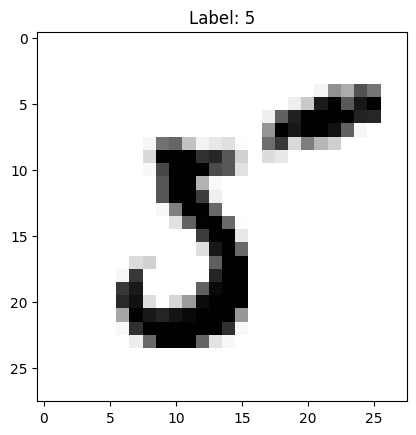

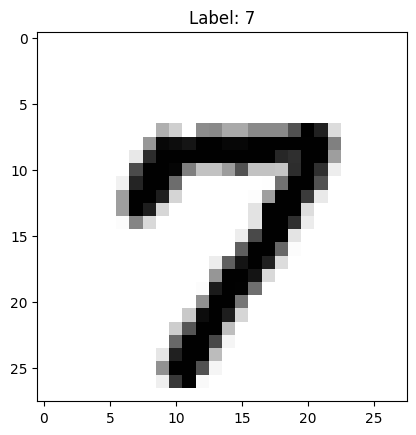

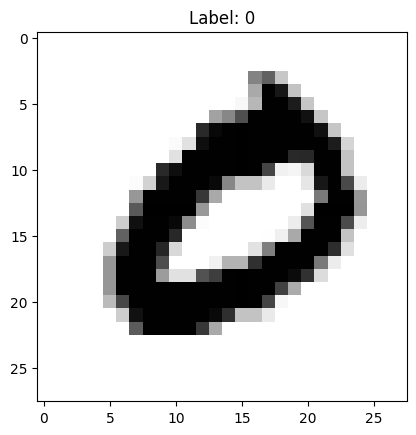

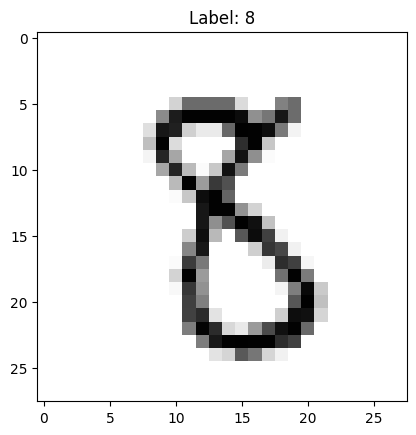

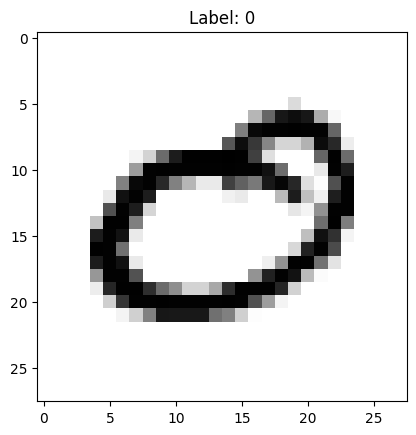

In [ ]:
for i in range(3):
    image_reshaped = X_train[i].reshape(28, 28)
    plt.imshow(image_reshaped, cmap='binary') # cmap='binary' deixa preto e branco
    plt.title(f"Label: {y_train[i]}")
    plt.show()

In [64]:

X_tsne_sample, _, y_tsne_sample, _ = train_test_split(
    X_train,
    y_train,
    train_size=3000,
    stratify=y_train,
    random_state=42
)

tsne = TSNE(random_state=42)
X_embedded = tsne.fit_transform(X_tsne_sample)
df_tsne = pd.DataFrame(X_embedded, columns=['axis_x', 'axis_y'])
df_tsne['Label'] = y_tsne_sample



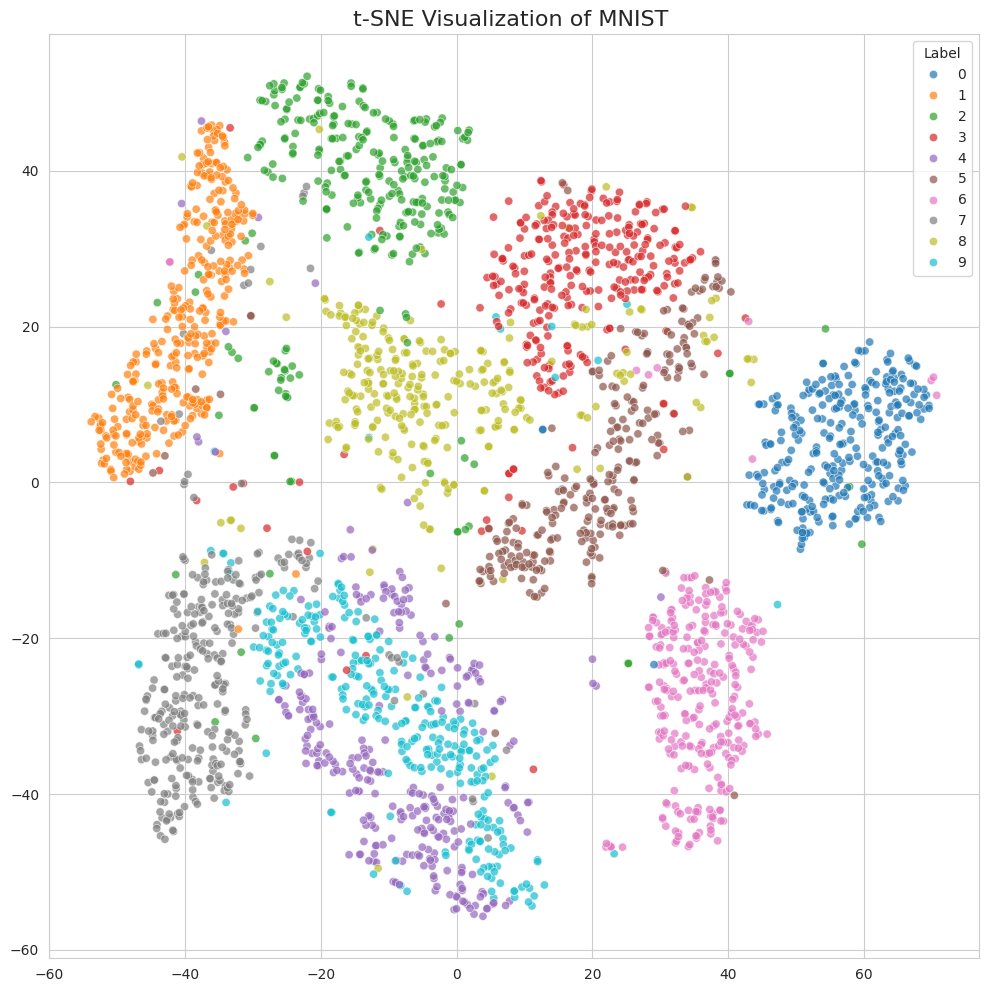

In [65]:
plt.figure(figsize=(12, 12))
sns.scatterplot(
    data=df_tsne,
    x='axis_x',
    y='axis_y',
    hue='Label',
    palette='tab10',
    legend='full',
    hue_order= [str(i) for i in range(10)],
    alpha=0.7
)

plt.title(f't-SNE Visualization of MNIST ', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.show()

This visualization shows how close the images of each number are in the multidimensional space.




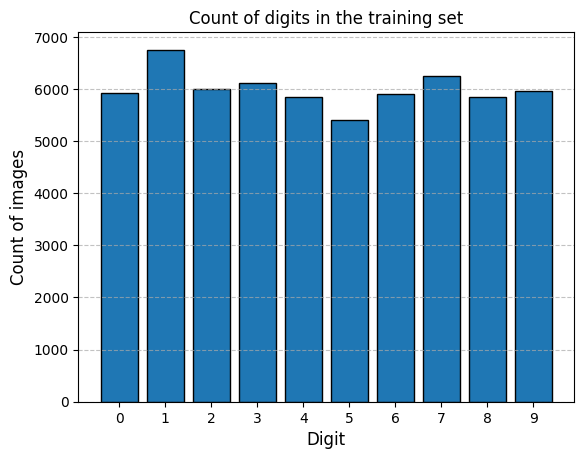

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(x = unique, height= counts,  edgecolor='black')
plt.grid(axis='y', linestyle='--',color ='darkgray', alpha=0.7)
plt.xlabel('Digit',fontsize = 12)
plt.ylabel('Count of images',fontsize = 12)
plt.title('Count of digits in the training set')
plt.show()

The classes are balanced.

# ⚙️  Data Preprocessing
---
Preparing data for Machine Learning algorithms.

In [19]:

pre_proces_pipeline = make_pipeline(MinMaxScaler())
X_train_transformed = pre_proces_pipeline.fit_transform(X_train)


# 🧠  Model Selection & Training
---
Training models and searching for optimal hyperparameters.

In [ ]:

models = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(random_state=42, max_iter=1000)),
    "KNN": KNeighborsClassifier(),
    "SGD": SGDClassifier(random_state=42)
}
scores = {}
for name , model in models.items():
    score = cross_val_score(model,
                    X_train_transformed,
                    y_train,
                    cv=5,
                    scoring="accuracy",
                    n_jobs= 4,
                    verbose= 3)
    scores[name] = {"mean": score.mean(), "std": score.std()}
    print("=" * 30)
    print(f"Model: {name}")
    print(f" Average  Accuracy: {score.mean():.4f}")
    print(f" Accuracy Standard Deviation: {score.std():.4f}")
    print("=" * 30)


Model: Logistic Regression
  F1 Average score: 0.9146
  F1 Standard Deviation: 0.0027
Model: KNN
  F1 Average score: 0.9692
  F1 Standard Deviation: 0.0006
Model: SGD
  F1 Average score: 0.9102
  F1 Standard Deviation: 0.0039


In [ ]:

score = cross_val_score(OneVsOneClassifier(SVC(random_state=42)),
                    X_train_transformed[:30000],
                    y_train[:30000],
                    cv=5,
                    scoring="accuracy",
                    n_jobs= 4,
                    verbose= 3)

print("=" * 30)
print("Model: SVM")
print(f"Average Accuracy: {score.mean():.4f}")
print(f"Accuracy Standard Deviation: {score.std():.4f}")
print("=" * 30)

Model: SVM
  F1 Average score: 0.9706
  F1 Standard Deviation: 0.0020


While the SVM achieved high accuracy without hyperparameter tuning, its computational cost was excessive requiring more training time than all other models combined. Consequently, KNN was selected as the optimal model due to its better balance between performance and complexity.


### Hyperparameter Tunning
---

In [48]:
knn = KNeighborsClassifier()

In [ ]:



nn_param_dist = {
    'n_neighbors': randint(low=1, high=50)

}


rf_search = RandomizedSearchCV(
    knn,
    param_distributions=nn_param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs= 4,
    verbose= 3
)

rf_search.fit(X_train_transformed, y_train)
print("=" * 30)
print(f"Best accuracy: {nn_param_dist.best_score_:.4f}")
print(f"Best Params: {nn_param_dist.best_params_}")
print("=" * 30)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best accuracy: 0.9675
Best Params: {'n_neighbors': 8}


In [50]:

param_grid_fine = {

    'n_neighbors': [3,4,5],
    'weights' :['distance','uniform']
}


grid_search = GridSearchCV(
    knn,
    param_grid=param_grid_fine,
    cv=3,
    scoring='accuracy',
    n_jobs= -1,
    verbose= 3
)
grid_search.fit(X_train_transformed, y_train)
print("=" * 30)
print(f"Best accuracy : {grid_search.best_score_:.4f}")
print("Best Params:", grid_search.best_params_)
print("=" * 30)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best accuracy : 0.9713
Best Params: {'n_neighbors': 4, 'weights': 'distance'}


We will conduct an error analysis to identify patterns in misclassification and guide future optimizations.

###  Error Analysis
---

In [ ]:
y_train_pred = cross_val_predict(grid_search.best_estimator_, X_train_transformed, y_train, cv=3)



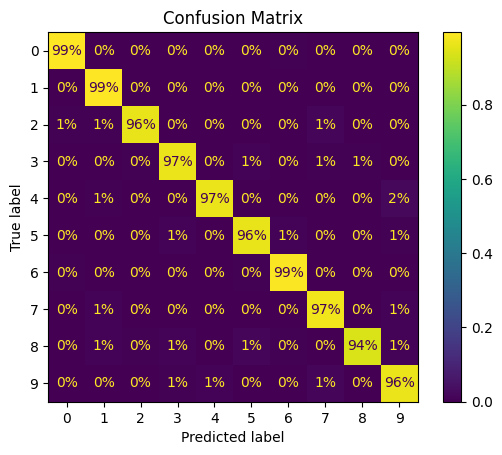

In [ ]:
conf_mx = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,normalize="true",values_format=".0%")
plt.title("Confusion Matrix Normalized")
plt.show()


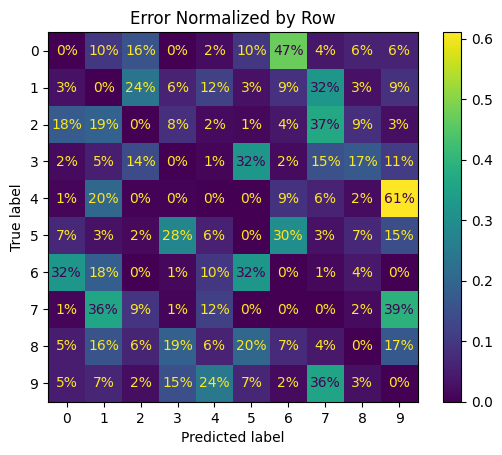

In [ ]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight,normalize="true",values_format=".0%")
plt.title("Error Normalized by Row")
plt.show()

Given the model's strong performance across all classes, I will implement Data Augmentation to improve robustness and generalization. Subsequently, I will apply Dimensionality Reduction to optimize computational efficiency with the expanded dataset.

# ⚙️ Feature Engineering
---


### Data Augmentation
---

In [9]:
from scipy.ndimage import shift
def shift_image(img,vec):
    """
    Shift an Array 1D using the size and the direction of the vector.

    Args:
        img (np.array): Array 1D  that will be shifted.
        vec (tup): Vector that will deslocate the image.

    Returns:
        np.array: The array shifted in the direction of the vector
    """

    img_2d = img.reshape(28, 28)

    img_2d_shifted = shift(img_2d, vec, cval=0, mode="constant")

    img_1d_shifted = img_2d_shifted.reshape(-1)
    return img_1d_shifted

In [31]:
vectors = [[0, 1], [0, -1]]

X_augmented_list = [image for image in X_train]
y_augmented_list = [label for label in y_train]

for image, label in zip(X_train, y_train):
    for vec in vectors:
        shifted_img = shift_image(image, vec)
        X_augmented_list.append(shifted_img)
        y_augmented_list.append(label)

X_augmented = np.array(X_augmented_list, dtype=np.float32)
y_augmented = np.array(y_augmented_list)

### Dimensionality Reduction
---

Reduce dimensionality preserving 95% variance to speed up KNN and remove noise.

In [32]:
print(y_train.shape)
print(y_augmented.shape)

(60000,)
(180000,)


In [33]:
print(X_train_transformed.shape)
print(X_augmented.shape)



(60000, 784)
(180000, 784)


In [34]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_augmented)

In [35]:
print(X_reduced.shape)

(180000, 158)


## Training the model with this modifications
---

In [36]:
pipeline_pca = make_pipeline(
    MinMaxScaler(),
    PCA(n_components=0.95, random_state=42),
    KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
)

In [38]:
pipeline_pca.fit(X_augmented, y_augmented)
y_train_pred = pipeline_pca.predict(X_augmented)


In [41]:
score = cross_val_score(pipeline_pca,
                    X_augmented,
                    y_augmented,
                    cv=5,
                    scoring="accuracy",
                    n_jobs= -1,
                    verbose= 3)

print("=" * 30)
print("Model: KNN with Dimensinality Reduction (PCA)")
print(f"Average Accuracy: {score.mean():.4f}")
print(f"Accuracy Standard Deviation: {score.std():.4f}")
print("=" * 30)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Model: KNN with Dimensinality Reduction (PCA)
Average Accuracy: 0.9869
Accuracy Standard Deviation: 0.0030


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.8min finished


# 📉  Model Evaluation
---
Validating the final model on the test data.

In [54]:
grid_search.best_estimator_.fit(X_train, y_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)

final_acc = accuracy_score(y_test, y_test_pred)
print("=" * 30)
print("Model: KNN ")
print(f"Test Accuracy: {final_acc*100:.2f}%")
print("=" * 30)

Model: KNN 
Test Accuracy: 97.70%


In [44]:
y_test_pred = pipeline_pca.predict(X_test)

final_acc = accuracy_score(y_test, y_test_pred)
print("=" * 30)
print("Model: KNN with Dimensinality Reduction (PCA)")
print(f"Test Accuracy: {final_acc*100:.2f}%")
print("=" * 30)

Model: KNN with Dimensinality Reduction (PCA)
Test Accuracy: 98.09%


# 🔍  Conclusion & Insights
---

The objective of surpassing 97% accuracy was successfully achieved. By leveraging feature engineering and unsupervised learning techniques, we enhanced the model's robustness and precision while significantly improving its computational efficiency.